In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/USER/3D Objects/healthcare/healthcare_dataset.csv')

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers,Patrick Parker,Charles Horton,Patty Norman,Ryan Hayes,Sharon Perez
Age,81,35,61,49,51,41,82,55,33,39
Gender,Female,Male,Male,Male,Male,Male,Male,Female,Male,Female
Blood Type,O-,O+,B-,B-,O-,AB+,AB+,O-,A+,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis,Arthritis,Hypertension,Arthritis,Diabetes,Asthma
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09,2020-08-20,2021-03-22,2019-05-16,2020-12-17,2022-12-15
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin,Robin Green,Patricia Bishop,Brian Kennedy,Kristin Dunn,Jessica Bailey
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray",Boyd PLC,"Wheeler, Bryant and Johns",Brown Inc,"Smith, Edwards and Obrien",Brown-Golden
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare,Aetna,Cigna,Blue Cross,Aetna,Blue Cross
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184,22522.363385,39593.435761,13546.817249,24903.03727,22788.236026


In [4]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [5]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Observation
- there are no null values in the datapoint

# Inspecting/cleaning datafame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

# EDA(Exploratory Data Analysis)

In [7]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,10000,9378,Michael Johnson,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,51.4522,19.588974,18.0,35.0,52.0,68.0,85.0
Gender,10000,2,Female,5075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,10000,8,AB-,1275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,10000,6,Asthma,1708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,10000,1815,2019-04-12,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,10000,9416,Michael Johnson,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,10000,8639,Smith PLC,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,10000,5,Cigna,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,10000.0,NaN,NaN,NaN,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283


# describe(include=’all’) provides a statistics summary of all data, include object, category etc. from the above analysis we can see that
- Michael Johnson is our top patient and has visited 7 times
- female are our top gender patients and visited 5075 times
- blood type AB- is top blood group with 1275
- the frequent/top medical condition is asthma
- Smith PLC Hospital is the most visited hospital and was visited 8639
- Cigna is the top Insurance_Provider
- Urgent is the most Admission_Type
- Penicillin is the top Medication
- Abnormal is the top Test_Results
- on 31 is the Day with most patient Admitted
- december is the most Month with most patient Admitted
- 52 is the avg age for the patients

In [8]:
# Numerical features

df.describe(exclude=['O'])

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


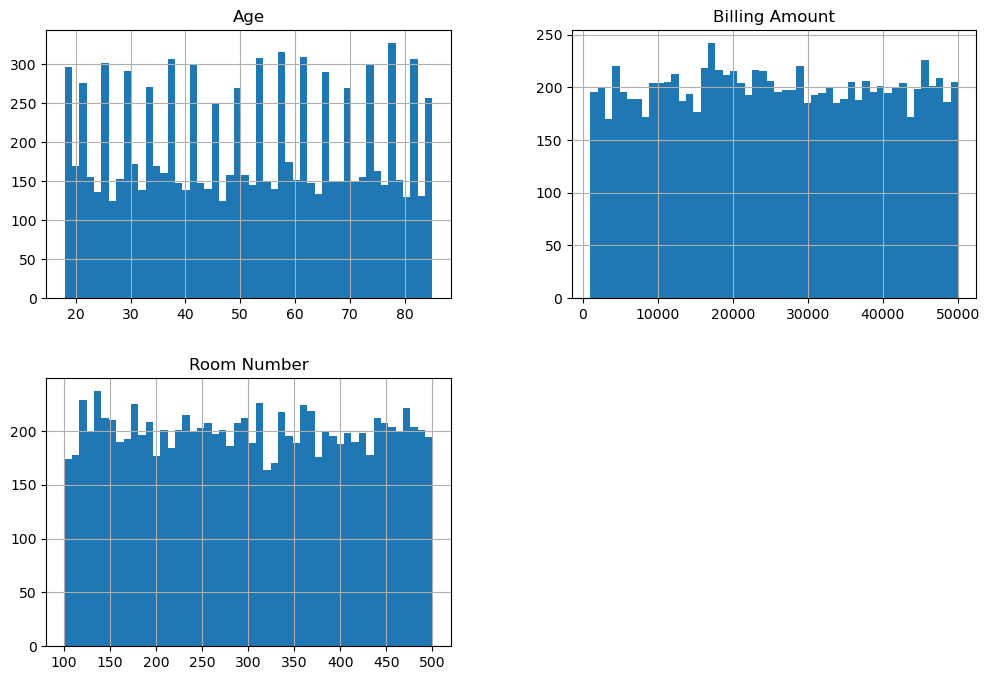

In [9]:
# Histogram  

df.hist(bins=50, figsize=(12,8))
plt.show()

# Observation
- Patients between Age 70 to 80 are the most common
- we have our highest admission in year 2020 and 2023



In [10]:
# categorical features

df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


# Observation
- Michael Johnson is the top patient and has visited 7 times
- Asthma is the top medical condtion among the patient
- Smith PLC hospital is the most visted hospital 
- Cigna is the highest insurance provider
- Urgent is the top Admission type for patient
- 2021-11-28 is the highest discharged date for patient with 14 discharged
- Penicillin is the most used medication

In [11]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

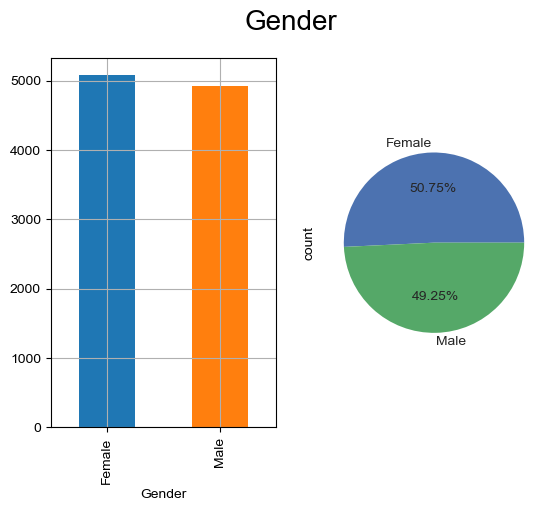

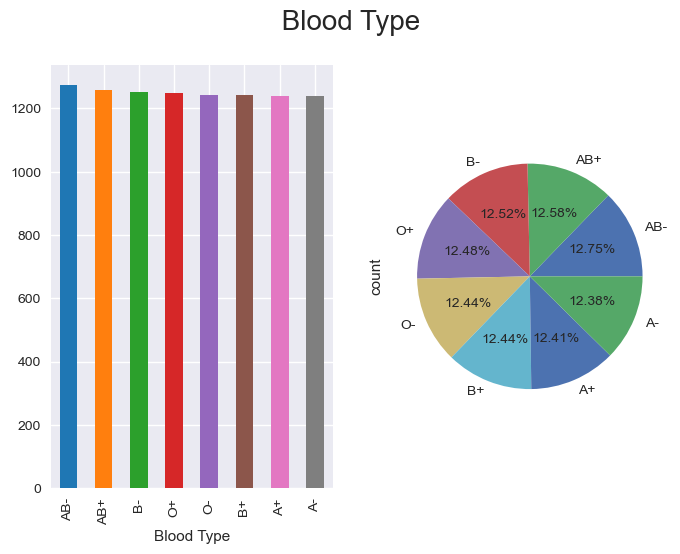

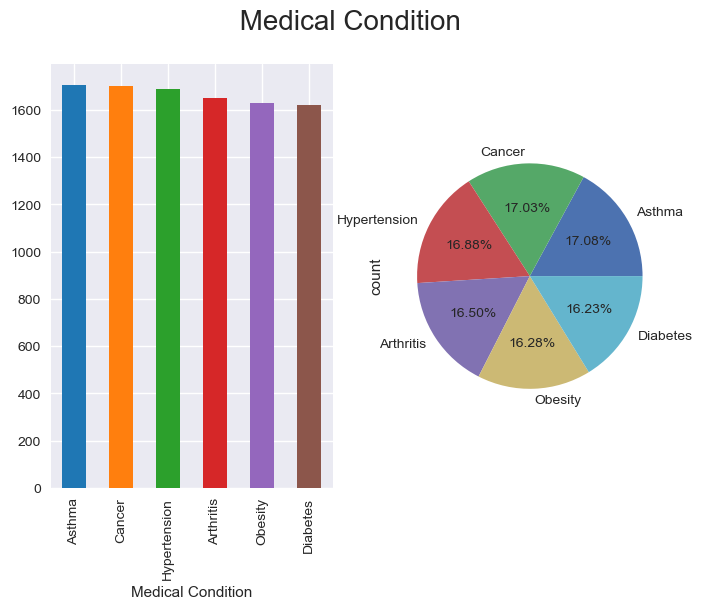

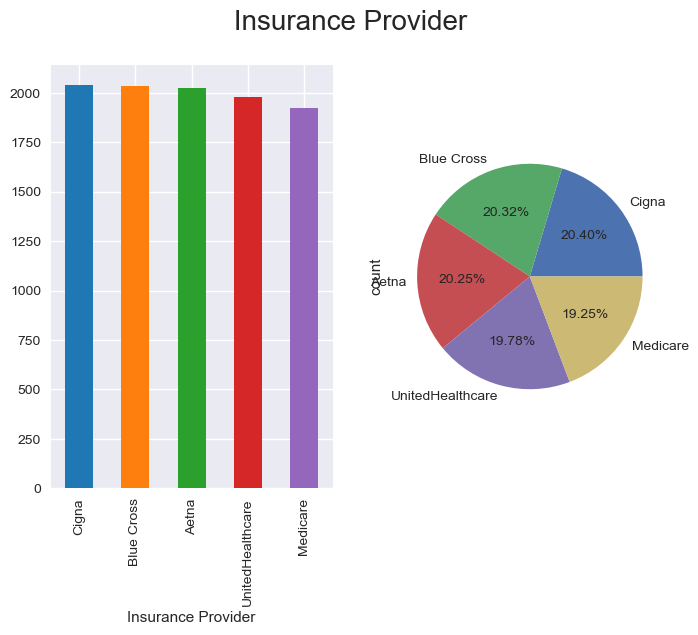

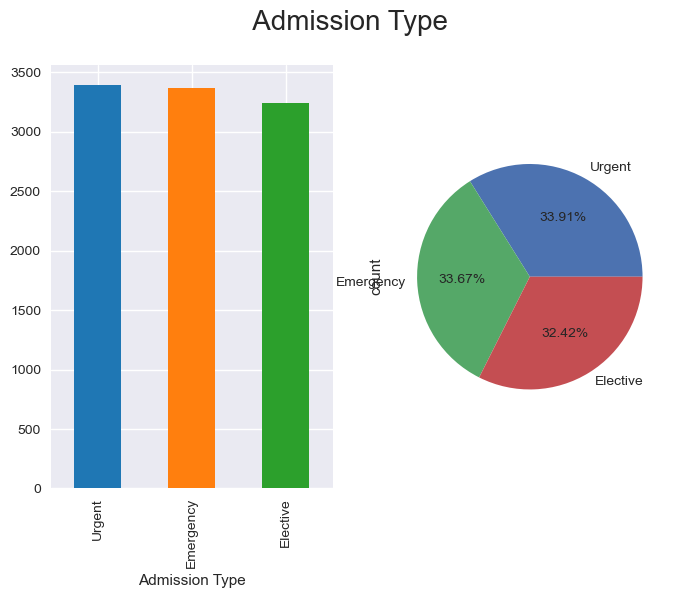

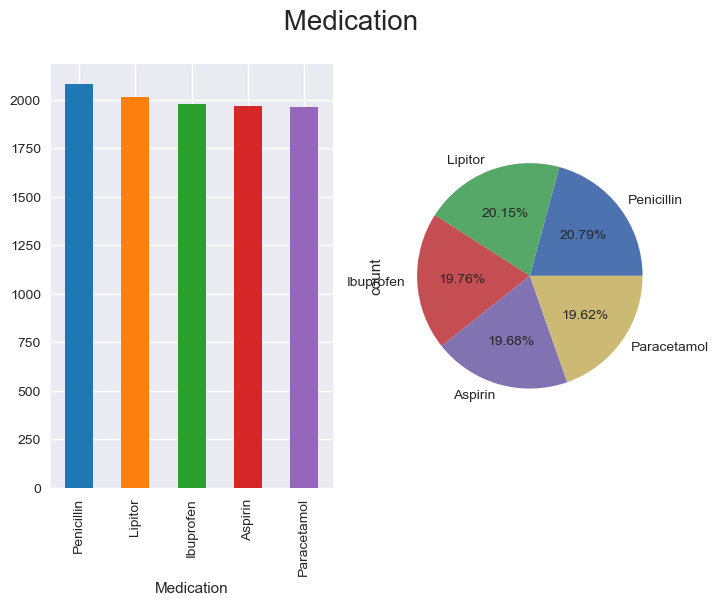

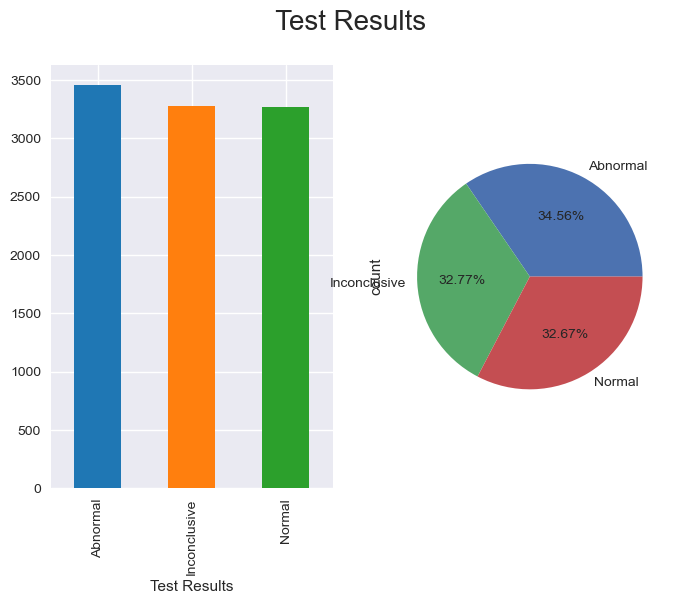

In [12]:
# Categorical Features
for i in cols:
    
    if i == 'Gender':

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('Gender', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle(' ' + i + ' ', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

# Observation
- Female are the top patients with 50.75%
- Blood group AB- is the most common with 12.75% follow by AB+ with 12.58% while A- is the least with 12.38%
- Asthma is the highest medical condition among the patients with 17.08% follow by Cancer with 17.03% while diabetes is the lowest
- Cigna is the top Insurance provider follow by Blue Cross
- Urgent is the most Admission type follow by Emergency
- Penicillin is the used medication follow by Lipitor 
- Abnormal is the highest result test



In [13]:
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

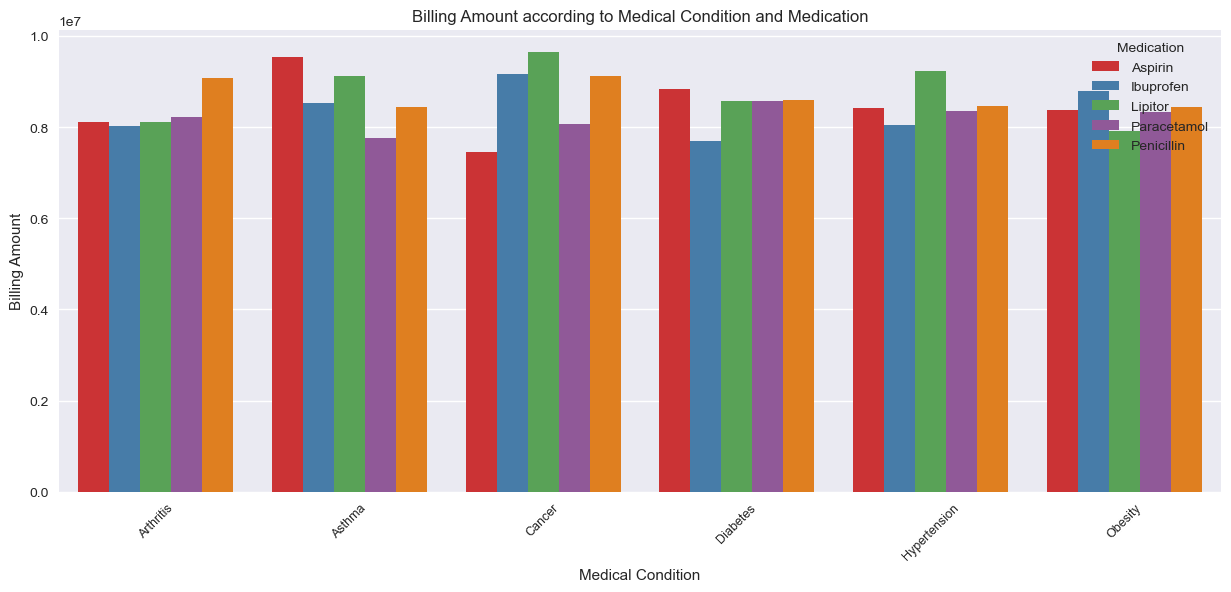

In [14]:
# Billing Amount according to Medical Condition and Medication
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

# Observation
- Pennicilin is the most expensive medication for Patient with Arthritis 
- Aspirin is the most expensive medication for patient with Asthma
- Lipitor is the most expensive medication for patient with cancer
- Aspirin is the most expensive medication for patient with diabetes
- Lipito is the most expensive medication for patient with hypertension
- Ibuprofen is the most expensive medication for patient with Obesity

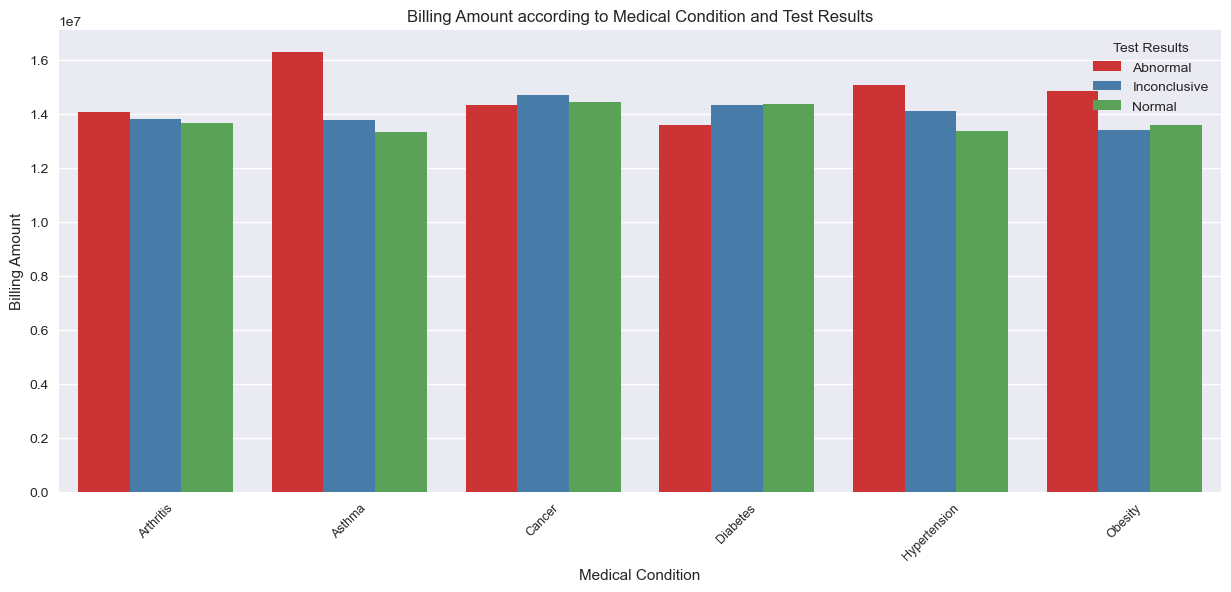

In [15]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

# Observation
- Arthritis Patient with Abnormal test result has the highest billing amount
- Asthma patient with Abnormal test result has the highest billing amount
- Cancer patient with Inconclusive test result has the highest billing amount
- Hypertension patient with Abnormal test result has the highest billing amount
- Obesity patient with Abnormal test result has the highest billing amount

In [16]:
# Let's create a column with the number of days hospitalized

df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']


df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14 days
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14 days
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30 days
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1 days
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24 days


In [17]:
# Highest 'Features' according to average number of days hospitalized

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Days hospitalized"]))

        fig.update_layout(title='Highest Gender according to average number of days hospitalized',
                          xaxis_title='Gender',
                          yaxis_title= "Days hospitalized",
                          plot_bgcolor='black', 
                          paper_bgcolor='gray',  
                          font=dict(color='white'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Days hospitalized']].mean().reset_index()
        char_bar = char_bar.sort_values(by=("Days hospitalized"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Days hospitalized']))

        fig.update_layout(title="Highest " + i + " according to average number of days hospitalized",
                          xaxis_title= i,
                          yaxis_title= "Days hospitalized",
                          plot_bgcolor='black', 
                          paper_bgcolor='gray',  
                          font=dict(color='white'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)
        

# Observation
- Female patient spent the highest number of days in the hospital
- Patient with blood group B- and B+ has the highest number of days hospitalized while A- has the lowest
- Arthritis patient has the highest number of days hospitalized
- John Adkins, Robert Peters, Margaret Watkins, Christina Henderson, Amy Martinez, Gina Oconnor, Robert Meadows, Christine Leblanc, Jasmibe Medina, Geoffrey Wallace: are the doctos with the highest number of days hosptalized
- Emergency is the highest admission type according to the number of days hospitalized
- Penicillin is the highest medication according to the number of days hospitalized 
- Abnomal is the highest test result according to the number of days hospitalized

In [18]:
# Highest "Features" according to Billing Amount

for i in cols:
    
    if i == 'Gender':

        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Billing Amount"]))

        fig.update_layout(title="Highest Gender According to " + 'Billing Amount',
                          xaxis_title='Gender',
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)

        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount']))

        fig.update_layout(title="Highest " + i + " According to Billing Amount",
                          xaxis_title= i,
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

# Observation
- Female patient has the highest billing amount 
- AB+ and A-patient has the highest billing amount
- Cancer has the highest billing amount
- Michael Johnson is the highest/most paid doctor
- Smith and Sons is the highest/most expensive hospital according to billing amount
- Cigna and Aetna are the highest/most expensive Insurance Provider according to the billing amount
- Urgent is the highest/most expensive admission type according to the billing amount
- Lipitor and Penicillin are the highest/most expensive medication according to the billing amount
- Abnormal test result is the highest/most expensive 



# EDA Bivariate Analysis
- Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

<Figure size 1300x1700 with 0 Axes>

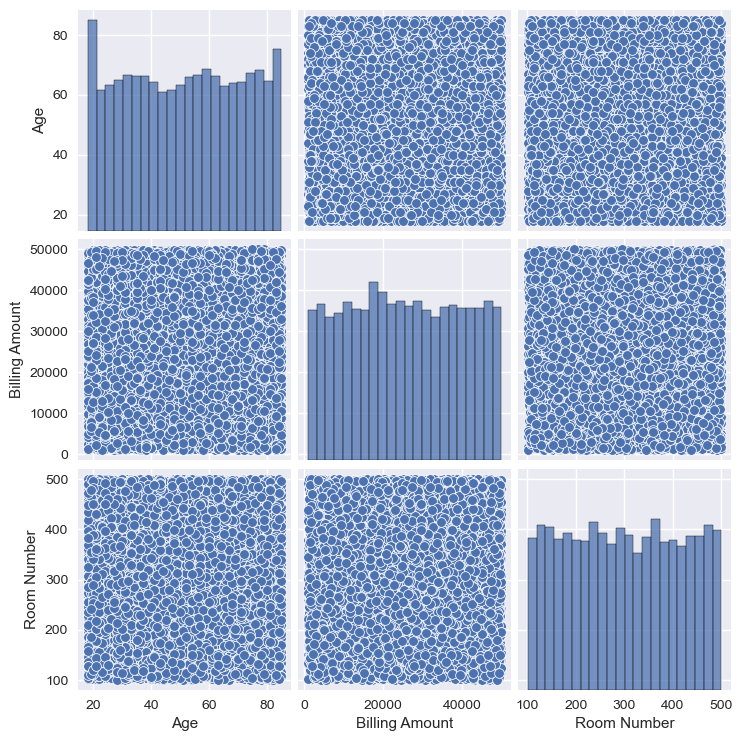

In [19]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df)
plt.show()


# Observation
- the variables has no effects on each other

In [20]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14 days
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14 days
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30 days
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1 days
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal,4 days
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal,23 days
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal,14 days
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal,20 days
